# Text Mining Project

Lie Reubensto - 2540124633

Dataset: <a href="https://www.kaggle.com/datasets/udacity/armenian-online-job-postings?resource=download">Armenian Online Job Postings (Kaggle)</a>

# Preparation

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import requests
import re
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
# Mount Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload CSV
path = "/drive/MyDrive/Text Mining/online-job-postings.csv"
df = pd.read_csv(path)
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [ ]:
# Only take two relevant columns: 'jobpost' and 'IT'
df_cut = df[['jobpost', 'IT']]
df_cut.head()

,jobpost,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,False
1,International Research & Exchanges Board (IREX...,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,True


In [ ]:
# Check information of the new dataframe
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   jobpost  19001 non-null  object
 1   IT       19001 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 167.1+ KB


In [ ]:
# Check how many rows each type of label have
df_cut['IT'].value_counts()

IT
False    15242
True      3759
Name: count, dtype: int64

In [ ]:
# Split data based on label
df_true= df_cut[df_cut['IT'] == True]
df_false= df_cut[df_cut['IT'] == False]

In [ ]:
# Limit the amount of data that has the label 'false' based on the amount of data that's 'true'
falseLimit= 12000-df_true.shape[0]
df_false2= df_false.iloc[0:falseLimit]
df_new = pd.concat([df_true, df_false2], ignore_index=True)

In [ ]:
# Check the data in the new dataframe
df_new

,jobpost,IT
0,Yerevan Brandy Company\r\nJOB TITLE: Software...,True
1,NetCall Communications\r\nJOB TITLE: Network ...,True
2,Xalt LLC\r\nJOB TITLE: Graphic Designer\r\nPO...,True
3,Caucasus Research Resource Center - Armenia\r\...,True
4,CIT Ltd.\r\nJOB TITLE: Programmer\r\nPOSITION...,True
...,...,...
11995,Rotapharm Pharmaceutical Company\r\nTITLE: Of...,False
11996,"""FINCA"" UCO CJSC\r\nTITLE: Internal Control D...",False
11997,Zeppelin Armenia LLC\r\nTITLE: Stockman\r\nOP...,False
11998,Synopsys Armenia\r\nTITLE: Layout Engineer/ S...,False


In [ ]:
# Check the info of the new 'limited' dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   jobpost  12000 non-null  object
 1   IT       12000 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 105.6+ KB


In [ ]:
# Check again how many rows each type of label have
df_new['IT'].value_counts()

IT
False    8241
True     3759
Name: count, dtype: int64

In [ ]:
# Check how many missing value the new dataframe has (appears to be none)
df_new = df_new.dropna(axis=1)
len(df_new)

12000

In [ ]:
# Convert label to numeric form
df_new['IT'].replace([True, False], [1, 0], inplace=True)
df_new.head()

,jobpost,IT
0,Yerevan Brandy Company\r\nJOB TITLE: Software...,1
1,NetCall Communications\r\nJOB TITLE: Network ...,1
2,Xalt LLC\r\nJOB TITLE: Graphic Designer\r\nPO...,1
3,Caucasus Research Resource Center - Armenia\r\...,1
4,CIT Ltd.\r\nJOB TITLE: Programmer\r\nPOSITION...,1


In [ ]:
# Checkpoint
df_pre = df_new.copy()

# Data Cleansing

In [ ]:
# Function for cleaning text
def cleansing(df):
    df_clean = df.str.lower()
    df_clean = [re.sub(r"http\S+", "", i) for i in df_clean]
    df_clean = [re.sub(r"&\S+", "", i) for i in df_clean]
    df_clean = [re.sub(r"\d+","", i) for i in df_clean]
    df_clean = [re.sub(r'[^\w\s]', ' ', i) for i in df_clean]
    df_clean = [re.sub(r'\s+',' ', i) for i in df_clean]
    return df_clean

In [ ]:
# Apply text cleaning
df_clean = df_pre
df_clean['clean_text'] = cleansing(df_clean['jobpost'])
df_clean.head()

,jobpost,IT,clean_text
0,Yerevan Brandy Company\r\nJOB TITLE: Software...,1,yerevan brandy company job title software deve...
1,NetCall Communications\r\nJOB TITLE: Network ...,1,netcall communications job title network admin...
2,Xalt LLC\r\nJOB TITLE: Graphic Designer\r\nPO...,1,xalt llc job title graphic designer position l...
3,Caucasus Research Resource Center - Armenia\r\...,1,caucasus research resource center armenia titl...
4,CIT Ltd.\r\nJOB TITLE: Programmer\r\nPOSITION...,1,cit ltd job title programmer position location...


In [ ]:
# Check maximum length of text (per row of dataframe)
max_sen = df_clean['clean_text'].str.split().str.len().max()
max_sen

3470

# Data Splitting

In [ ]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Spplit data to train and test data
x_train, x_test, y_train, y_test = train_test_split(df_clean['clean_text'], df_clean['IT'], test_size=0.2, random_state=23, stratify=df_clean['IT'])

In [ ]:
len(x_train)

9600

In [ ]:
len(y_train)

9600

In [ ]:
x_train.str.split().str.len().max()

3470

# Preprocessing (Tokenization, Remove Stopwords, Lemmatization)

In [ ]:
# Import Libraries
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Tokenization
word_token_train = [word_tokenize(i) for i in x_train]
word_token_test = [word_tokenize(i) for i in x_test]
print(len(word_token_train), len(word_token_test))

9600 2400


In [ ]:
# Remove Stopwords
stop_words = set(stopwords.words('english')) # Get a list of stop words in the English language
filtered_tokens_train = [[word for word in sublist if word not in stop_words and len(word) > 1] for sublist in word_token_train]
filtered_tokens_test = [[word for word in sublist if word not in stop_words and len(word) > 1] for sublist in word_token_test]

In [ ]:
# Lemmatization
lemma=WordNetLemmatizer()

lemmatize_tokens_train = [[lemma.lemmatize(word) for word in sublist] for sublist in filtered_tokens_train] # default: n, nouns 
lemmatize_tokens_train = [[lemma.lemmatize(word, 'v') for word in sublist] for sublist in lemmatize_tokens_train] # verbs 
lemmatize_tokens_train = [[lemma.lemmatize(word, 'a') for word in sublist] for sublist in lemmatize_tokens_train] # adjectives 
lemmatize_tokens_train = [[lemma.lemmatize(word, 'r') for word in sublist] for sublist in lemmatize_tokens_train] # adverbs 
lemmatize_tokens_train = [[lemma.lemmatize(word, 's') for word in sublist] for sublist in lemmatize_tokens_train] # satellite adjectives

lemmatize_tokens_test = [[lemma.lemmatize(word) for word in sublist] for sublist in filtered_tokens_test]
lemmatize_tokens_test = [[lemma.lemmatize(word, 'v') for word in sublist] for sublist in lemmatize_tokens_test]
lemmatize_tokens_test = [[lemma.lemmatize(word, 'a') for word in sublist] for sublist in lemmatize_tokens_test]
lemmatize_tokens_test = [[lemma.lemmatize(word, 'r') for word in sublist] for sublist in lemmatize_tokens_test]
lemmatize_tokens_test = [[lemma.lemmatize(word, 's') for word in sublist] for sublist in lemmatize_tokens_test]

x_train_text = [' '.join(sublist) for sublist in lemmatize_tokens_train]
x_test_text = [' '.join(sublist) for sublist in lemmatize_tokens_test]

In [ ]:
x_train_text[0]

'armentel cjsc title senior mediaplanning specialist announcement code smps open eligibility criterion interest candidate location yerevan armenia job description job responsibility participate work annual strategic mediaplan mass corporate market company analyse competitiveness mass corporate market plan advertise campaign accordance medium preference target audience ass medium effectiveness advertise campaign prepare tactical brief procurement provide recommendation project profitability increase control medium budget tactical campaign compile production poster order realize control launch process advertise campaign compile submit medium documentation plan report require qualification university degree field sociology economics least year work experience relate field experience mediaplanning plus understand medium process interaction medium analysis experience write maintain strategic plan effective solution tactical task mediaplanning buy analytical skill responsible personality abi

In [ ]:
print(len(x_train_text), len(x_test_text))

9600 2400


# Vectorization (TF-IDF)

In [ ]:
# Import Library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Vectorize
vectorizer = TfidfVectorizer()
train_TFIDF = vectorizer.fit_transform(x_train_text)
test_TFIDF = vectorizer.transform(x_test_text)

In [ ]:
print(train_TFIDF.shape[0], test_TFIDF.shape[0])

9600 2400


In [ ]:
TFIDF_train=pd.DataFrame(train_TFIDF.toarray(), columns=vectorizer.get_feature_names_out())
TFIDF_train.head()

,_ama_,_apf_converse,_application,_applicationform,_arm,_javascript,_ru,a_ann_rus,a_bezhanyan,a_form_rus,...,zookeeper,zoology,zorian,zte,zugdidi,zurabian,zusammenarbeit,zvardnots,zvartnots,zx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
TFIDF_test=pd.DataFrame(test_TFIDF.toarray(), columns=vectorizer.get_feature_names_out())
TFIDF_test.head()

,_ama_,_apf_converse,_application,_applicationform,_arm,_javascript,_ru,a_ann_rus,a_bezhanyan,a_form_rus,...,zookeeper,zoology,zorian,zte,zugdidi,zurabian,zusammenarbeit,zvardnots,zvartnots,zx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train = np.expand_dims(TFIDF_train, axis=1)
x_test = np.expand_dims(TFIDF_test, axis=1)

# Train Model Bi-LSTM

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, LayerNormalization
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Create Model Bi-LSTM
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=False), input_shape=(1, x_train.shape[2])))
model.add(LayerNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               17229824  
 al)                                                             
                                                                 
 layer_normalization (Layer  (None, 256)               512       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 17230593 (65.73 MB)
Trainable params: 17230593 (65.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(len(x_train), len(y_train), len(x_test), len(y_test))

9600 9600 2400 2400


In [ ]:
# Model Training
train_model = model.fit(np.array(x_train), np.array(y_train), epochs=400, validation_data=(np.array(x_test), np.array(y_test)), batch_size=32,  callbacks=[early_stopping])

Epoch 1/400
300/300 [==============================] - 10s 17ms/step - loss: 0.3879 - accuracy: 0.8416 - val_loss: 0.2614 - val_accuracy: 0.9067
Epoch 2/400
300/300 [==============================] - 4s 14ms/step - loss: 0.2460 - accuracy: 0.9048 - val_loss: 0.2162 - val_accuracy: 0.9142
Epoch 3/400
300/300 [==============================] - 4s 14ms/step - loss: 0.2120 - accuracy: 0.9156 - val_loss: 0.1873 - val_accuracy: 0.9258
Epoch 4/400
300/300 [==============================] - 4s 13ms/step - loss: 0.1933 - accuracy: 0.9232 - val_loss: 0.1792 - val_accuracy: 0.9354
Epoch 5/400
300/300 [==============================] - 4s 13ms/step - loss: 0.1811 - accuracy: 0.9272 - val_loss: 0.1663 - val_accuracy: 0.9362
Epoch 6/400
300/300 [==============================] - 4s 13ms/step - loss: 0.1706 - accuracy: 0.9321 - val_loss: 0.1599 - val_accuracy: 0.9383
Epoch 7/400
300/300 [==============================] - 4s 13ms/step - loss: 0.1606 - accuracy: 0.9365 - val_loss: 0.1552 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# List all data in history
print(train_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


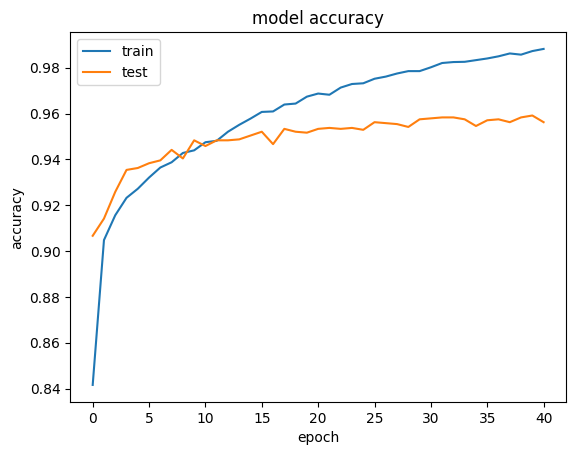

In [ ]:
# Model's accuracy history
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

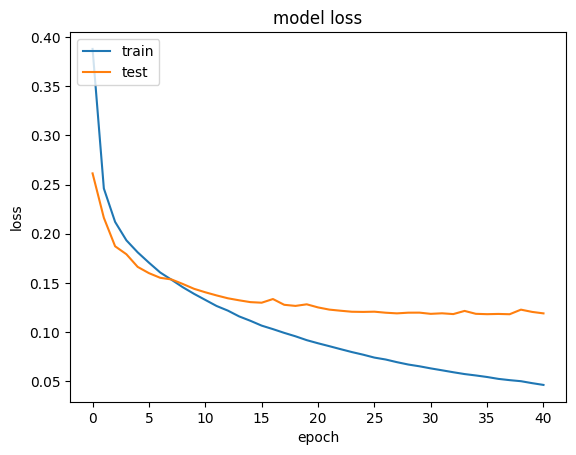

In [ ]:
# Model's loss history
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Predict the model's result with test data
pred = model.predict(x_test)
pred

75/75 [==============================] - 1s 6ms/step


array([[9.9999750e-01],
       [1.2291989e-02],
       [1.8567842e-03],
       ...,
       [1.0867087e-04],
       [9.9999881e-01],
       [3.1027559e-03]], dtype=float32)

In [ ]:
# Round the result to 0 or 1
pred= np.round(pred)
pred

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1648
           1       0.94      0.92      0.93       752

    accuracy                           0.96      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.96      0.96      0.96      2400



In [ ]:
# Save Model
# model.save('drive/MyDrive/Text Mining/TF-IDF Bi-LSTM 1.keras')
# model.save_weights('drive/MyDrive/Text Mining/Weight TF-IDF Bi-LSTM 1')

# Train Model SVM

In [ ]:
# Create SVM Model
from sklearn.svm import SVC
SVM = SVC(random_state=42, verbose=True)
SVM

SVC(random_state=42, verbose=True)

In [ ]:
# Model Training
SVM.fit(TFIDF_train, y_train)

[LibSVM]

SVC(random_state=42, verbose=True)

In [ ]:
# Print the best features from the SVM Model that has been trained
print('N Features:', SVM.n_features_in_)
print('N Iterations:', SVM.n_iter_) # Number of iterations
print('N', SVM.n_support_) # Number of support vectors per class

N Features: 16697
N Iterations: [5413]
N [2338 1250]


In [ ]:
# Predict the model's result with test data
SVMPred = SVM.predict(TFIDF_test)
print(classification_report(y_test, SVMPred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1648
           1       0.96      0.90      0.93       752

    accuracy                           0.96      2400
   macro avg       0.96      0.94      0.95      2400
weighted avg       0.96      0.96      0.96      2400



# Train Model Random Forest Classifier

In [ ]:
# Create Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(verbose=1)
RF.fit(TFIDF_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   16.7s


RandomForestClassifier(verbose=1)

In [ ]:
# Print the best features from the Random Forest Classifier Model that has been trained
print('N Features:', RF.n_features_in_)
print('N Iterations:', RF.max_samples)
print('Feature Importances:', RF.feature_importances_)

N Features: 16697
N Iterations: None
Feature Importances: [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.39381416e-05
 2.69316379e-05 0.00000000e+00]


In [ ]:
# Predict the model's result with test data
RFPred = RF.predict(TFIDF_test)
print(classification_report(y_test, RFPred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1648
           1       0.95      0.87      0.91       752

    accuracy                           0.95      2400
   macro avg       0.95      0.93      0.94      2400
weighted avg       0.95      0.95      0.95      2400



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


In [ ]:
# Save Model
# import joblib
# joblib.dump(SVM, 'drive/MyDrive/Text Mining/svm.pkl')
# joblib.dump(RF, 'drive/MyDrive/Text Mining/RF.pkl')

['drive/MyDrive/Text Mining/RF.pkl']

In [ ]:
# Clear session
tf.keras.backend.clear_session()